<a href="https://colab.research.google.com/github/mohamadmorady412/Lung-cancer-diagnosis-based-DL-and-ML-methods/blob/main/Pre_Ml_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import os
import random
import shutil

#ex_cop = False
def copy_random_images(source_dir, destination_dir, num_images_per_section) -> None:
  #global ex_cop

  #return if ex_cop else None
  #ex_cop = True

  if not os.path.exists(source_dir):
      print(f"دایرکتوری مبدا ({source_dir}) یافت نشد.")
      return
  if not os.path.exists(destination_dir):
      os.makedirs(destination_dir)

  all_images = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

  section1 = all_images[:5000]
  section2 = all_images[5000:10000]
  section3 = all_images[10000:]


  for section, start_index in zip([section1, section2, section3], [0, 10, 50]):
      selected_images = random.sample(section, num_images_per_section)
      for image in selected_images:
          source_file = os.path.join(source_dir, image)
          destination_file = os.path.join(destination_dir, f"{start_index}_{image}")
          shutil.copy2(source_file, destination_file)

In [28]:
copy_random_images("/content/Lung-data2/Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases","/content/DEST2/55",1)

ValueError: Sample larger than population or is negative

In [ ]:
import cv2
import numpy as np

In [ ]:
def apply_parallel_noise(image, noise_factor=0.1):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv = hsv.astype(np.float128)

    noise = np.random.rand(*hsv.shape[2]) * noise_factor

    hsv[:, :, 2] += noise

    image_with_noise = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return image_with_noise

In [ ]:
for img_path in os.listdir('/content/DEST/55'):
  img = cv2.imread(os.path.join('/content/DEST/55', img_path))
  img_with_noise = apply_parallel_noise(img)
  cv2.imwrite(os.path.join('/content/DEST/55', img_path), img_with_noise)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3>; VDepth = cv::impl::{anonymous}::Set<0, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
source_directory = "/content/drive/MyDrive/Merged_folder/merged_folder"
destination_directory = "/content/DEST/55"
num_images_to_copy = 1

copy_random_images(source_directory, destination_directory, num_images_to_copy)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator().flow_from_directory("/content/DEST", class_mode=None)

Found 3 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet101

model = ResNet101(weights='imagenet', include_top=False, pooling='avg')

In [ ]:
features = model.predict(gen)
features

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


array([[4.2857015e-01, 0.0000000e+00, 1.5549773e-02, ..., 1.6606194e-01,
        1.2069521e-01, 1.1858735e-03],
       [6.6452071e-02, 0.0000000e+00, 0.0000000e+00, ..., 4.3107439e-03,
        6.9870371e-03, 0.0000000e+00],
       [1.4861884e-02, 0.0000000e+00, 3.5444312e-02, ..., 0.0000000e+00,
        1.1725147e+00, 1.4148016e+00]], dtype=float32)

 ...]

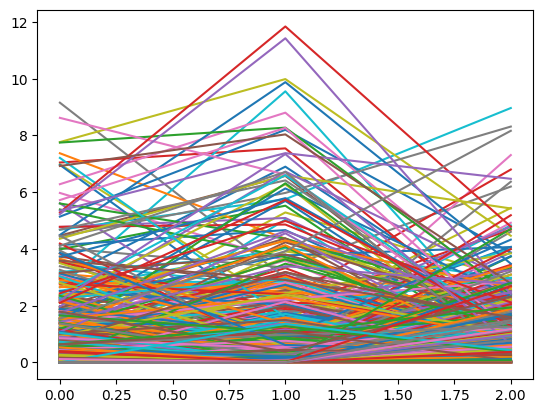

In [ ]:
import matplotlib.pyplot as plt

plt.plot(features)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [29]:
import cv2
from google.colab.patches import cv2_imshow

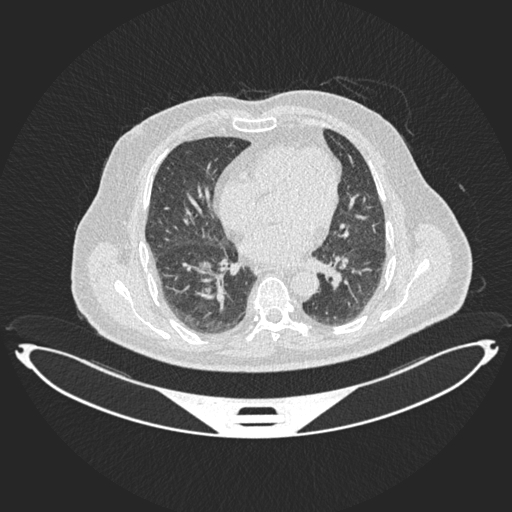

In [37]:
img = cv2.imread("/content/Lung-data2/Data/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (2).jpg")
cv2_imshow(img)

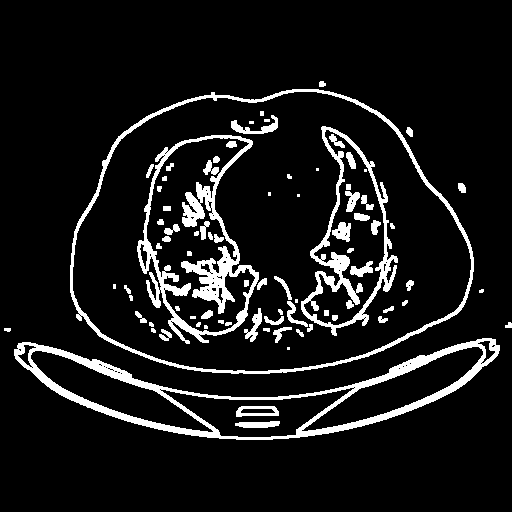

In [38]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 250, 200)

thickness = 1
edges = cv2.dilate(edges, np.ones((3,3), np.uint8), iterations=thickness)

cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()